# Scanning Session Ingestion

## Setup

### Connect to the database

If you are don't have your login information, contact the administrator.

Using local config file (see [01_pipeline](./01_pipeline.ipynb)):

In [1]:
import os
# change to the upper level folder to detect dj_local_conf.json
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
assert os.path.basename(os.getcwd())=='adamacs', ("Please move to the main directory")
import datajoint as dj; dj.conn()

from adamacs.pipeline import subject, session, surgery, scan, equipment
from adamacs import utility
from adamacs.ingest import session as isess
sub, lab, protocol, line, mutation, user, project, subject_genotype, subject_death = (
    subject.Subject(), subject.Lab(), subject.Protocol(), subject.Line(), 
    subject.Mutation(), subject.User(), subject.Project(), subject.SubjectGenotype(), 
    subject.SubjectDeath())

[2023-07-19 15:05:28,727][INFO]: Connecting tobiasr@172.26.128.53:3306
[2023-07-19 15:05:28,766][INFO]: Connected tobiasr@172.26.128.53:3306


In [2]:
# subject.Subject.drop()
# subject.Mutation.drop()
# subject.Protocol.drop()
# subject.Line.drop()
# subject.SubjectGenotype.drop()
# equipment.Equipment.drop()
# scan.Scan.drop()
# session.ProjectSession.drop()
# imaging.Processing.drop()

In [3]:
# session.Session.delete()


In [4]:
scan.Scan.describe()

'-> session.Session\nscan_id              : varchar(12)                  \n---\n-> [nullable] equipment.Equipment\n-> scan.AcquisitionSoftware\nscan_notes=""        : varchar(4095)                # free-notes\n'

In [5]:
dj.__version__

'0.14.1'

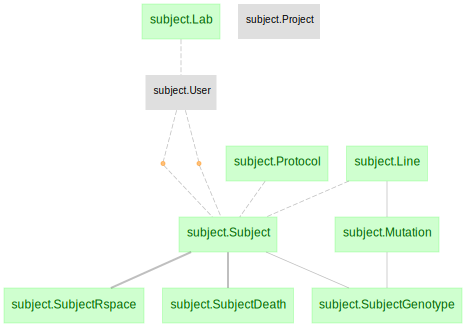

In [6]:
dj.Diagram(subject)

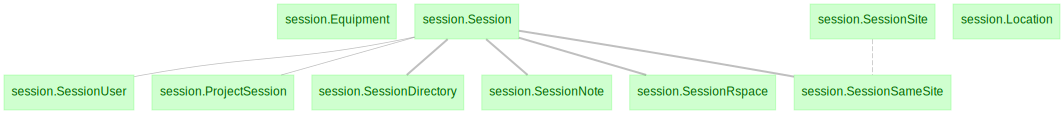

In [7]:
dj.Diagram(session) 

In [8]:
session.SessionSameSite()

session_id,same_site_id
sess9FI8ETDQ,sess9FI8ETDQ
sess9FJ4IJOQ,sess9FJ4IJOQ


In [9]:
subject.Subject.proj("subject") * session.Session.proj("session_id") & 'subject = "ROS-1346"'

subject PyRat import uses this for earmark value,session_id


In [10]:
session_key = 'sess9FB2LN5C'
session_dict = {'session_id': session_key}

In [12]:
 session.Session.insert1((session_dict))

MissingAttributeError: Field 'subject' doesn't have a default value

In [ ]:
session.SessionSameSite()

In [ ]:
session.SessionSameSite.describe()

In [ ]:
session.SessionUser()

In [ ]:
session.SessionNote()

In [ ]:
dj.Diagram(scan) 

In [ ]:
scan.ScanInfo.ScanFile()

In [ ]:
scan.ScanInfo.Field()

In [ ]:
scan.ScanPath()

In [ ]:
scan.ScanLocation()

In [ ]:
scan.AcquisitionSoftware()

In [ ]:
scan.Channel()

Manual entry:

In [ ]:
# Manual Entry
import datajoint as dj; import getpass
dj.config['database.host'] = '172.26.128.53'        # Put the server name between these apostrophe
dj.config['database.user'] = 'danielmk'             # Put your user name between these apostrophe
dj.config['database.password'] = getpass.getpass()  # Put your password in the prompt
dj.conn()

from adamacs.pipeline import subject, session, surgery, scan, equipment
from adamacs import utility
from adamacs.ingest import session as isess
sub, lab, protocol, line, mutation, user, project, subject_genotype, subject_death = (
    subject.Subject(), subject.Lab(), subject.Protocol(), subject.Line(), 
    subject.Mutation(), subject.User(), subject.Project(), subject.SubjectGenotype(), 
    subject.SubjectDeath())


## Ingesting scan

Ingest all scans associated with a given session ID.

In [ ]:
# isess.ingest_session_scan('sess9FB2LN5C', verbose=True)
isess.ingest_session_scan('sess9FGLZLRI', verbose=False) #TR: needs to be SessioID ("sess...")

In [ ]:
subject.Subject() & session.Session()

In [ ]:
session.SessionNote()

In [ ]:
session.SessionDirectory() * session.ProjectSession() * sub

In [ ]:
session.ProjectSession()

In [ ]:
key='scan9FG1UAQG'
(scan.Scan & f'scan_id=\"{key}\"')

Simple user look-up to get user_id from shorthand

In [ ]:
key='RN'
query = (subject.User & f'initials=\"{key}\"')
id = query.fetch("user_id")[0]
print(key + ' = ' + str(id))

In [ ]:
key='%Tob%'
query = (subject.User & f'name LIKE \"{key}\"')
id = query.fetch("user_id")
print(key + ' = ' + str(id))

In [ ]:
key='%Ji%'
query = (subject.User & f'name LIKE \"{key}\"')
query.fetch("email")

In [ ]:
query = subject.Subject() & '"ROS-1380"'
query.fetch()

In [ ]:
subject.Subject() & "subject = 'ROS-1346'"